# Proyecto Regresion Lineal

Video expliación <https://youtu.be/zdDEtRFfbPc>

In [1]:
#Importar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
#Importar el Dataset

dataset = np.load("/Users/diegoalvarez/Documents/Maestria/Python/Proyecto/proyecto_training_data.npy")

In [3]:
SP = dataset[:, 0]
OQ = dataset[:, 1]
FFSF = dataset[:, 2]
TRAG = dataset[:, 3]
YB = dataset[:, 4]
LF = dataset[:, 5]
print(SP)
print(OQ)
print(FFSF)
print(TRAG)
print(YB)
print(LF)

[208500. 181500. 223500. ... 266500. 142125. 147500.]
[7. 6. 7. ... 7. 5. 5.]
[ 856. 1262.  920. ... 1188. 1078. 1256.]
[8. 6. 6. ... 9. 5. 6.]
[2003. 1976. 2001. ... 1941. 1950. 1965.]
[65. 80. 68. ... 66. 68. 75.]


In [4]:
dframe = {'SP': (SP),
                 'OQ': (OQ),
                 'FFSF': (FFSF),
                 'TRAG': (TRAG),
                 'YB': (YB),
                 'LF': (LF)
            }
df = pd.DataFrame(dframe)
df    

,SP,OQ,FFSF,TRAG,YB,LF
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [5]:
#Revisión de datos NaN
porcentaje_nan_s = (df['SP'].isna().sum() / len(df['SP'])) * 100
porcentaje_nan_o = (df['OQ'].isna().sum() / len(df['OQ'])) * 100
porcentaje_nan_f = (df['FFSF'].isna().sum() / len(df['FFSF'])) * 100
porcentaje_nan_t = (df['TRAG'].isna().sum() / len(df['TRAG'])) * 100
porcentaje_nan_y = (df['YB'].isna().sum() / len(df['YB'])) * 100
porcentaje_nan_l = (df['LF'].isna().sum() / len(df['LF'])) * 100
print(f'El porcentaje de valores NaN en la variable SalePrice es: {porcentaje_nan_s:.2f}%')
print(f'El porcentaje de valores NaN en la variable OverallQual es: {porcentaje_nan_o:.2f}%')
print(f'El porcentaje de valores NaN en la variable FstFlrSF es: {porcentaje_nan_f:.2f}%')
print(f'El porcentaje de valores NaN en la variable TotRmsAbvGrd es: {porcentaje_nan_t:.2f}%')
print(f'El porcentaje de valores NaN en la variable YearBuilt es: {porcentaje_nan_y:.2f}%')
print(f'El porcentaje de valores NaN en la variable LotFrontage es: {porcentaje_nan_l:.2f}%')

El porcentaje de valores NaN en la variable SalePrice es: 0.00%
El porcentaje de valores NaN en la variable OverallQual es: 0.00%
El porcentaje de valores NaN en la variable FstFlrSF es: 0.00%
El porcentaje de valores NaN en la variable TotRmsAbvGrd es: 0.00%
El porcentaje de valores NaN en la variable YearBuilt es: 0.00%
El porcentaje de valores NaN en la variable LotFrontage es: 17.74%


LotFrontage: 
Media: 70.04995836802665 
Mediana: 69.0 
Máximo: 313.0 
Mínimo: 21.0



/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


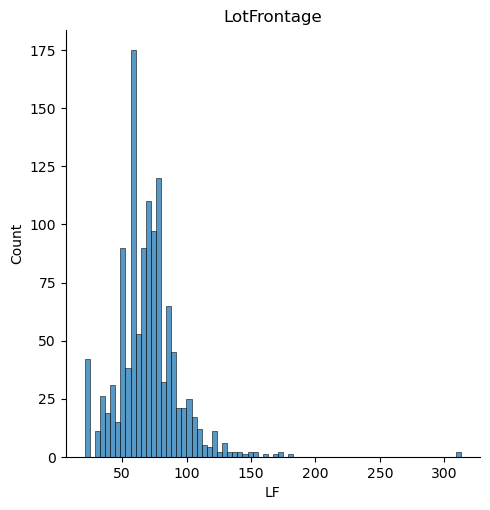

In [6]:
#Análisis de la varible con Nan

LFM = np.nanmean(LF)
LFMD = np.nanmedian(LF)
LFMX = np.nanmax(LF)
LFMN = np.nanmin(LF)
print('LotFrontage:','\n''Media:', LFM,'\n''Mediana:', LFMD, '\n''Máximo:', LFMX,'\n''Mínimo:', LFMN)
print()

gfs = sns.displot(df['LF'])
gfs.set(title='LotFrontage')
plt.show()

In [7]:
#Imputamos los datos NaN

dt_imputados = np.where(np.isnan(dataset), LFMD, dataset)
print(dt_imputados)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [8]:
df_ma = pd.DataFrame(dt_imputados, columns=['SalePrice', 'OverallQual', 'FstFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df_ma

,SalePrice,OverallQual,FstFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [9]:
porcentaje_nan_si = (df_ma['SalePrice'].isna().sum() / len(df['SP'])) * 100
porcentaje_nan_oi = (df_ma['OverallQual'].isna().sum() / len(df['OQ'])) * 100
porcentaje_nan_fi = (df_ma['FstFlrSF'].isna().sum() / len(df['FFSF'])) * 100
porcentaje_nan_ti = (df_ma['TotRmsAbvGrd'].isna().sum() / len(df['TRAG'])) * 100
porcentaje_nan_yi = (df_ma['YearBuilt'].isna().sum() / len(df['YB'])) * 100
porcentaje_nan_li = (df_ma['LotFrontage'].isna().sum() / len(df['LF'])) * 100
print(f'El porcentaje de valores NaN en la variable SalePrice es: {porcentaje_nan_si:.2f}%')
print(f'El porcentaje de valores NaN en la variable OverallQual es: {porcentaje_nan_oi:.2f}%')
print(f'El porcentaje de valores NaN en la variable FstFlrSF es: {porcentaje_nan_fi:.2f}%')
print(f'El porcentaje de valores NaN en la variable TotRmsAbvGrd es: {porcentaje_nan_ti:.2f}%')
print(f'El porcentaje de valores NaN en la variable YearBuilt es: {porcentaje_nan_yi:.2f}%')
print(f'El porcentaje de valores NaN en la variable LotFrontage es: {porcentaje_nan_li:.2f}%')

El porcentaje de valores NaN en la variable SalePrice es: 0.00%
El porcentaje de valores NaN en la variable OverallQual es: 0.00%
El porcentaje de valores NaN en la variable FstFlrSF es: 0.00%
El porcentaje de valores NaN en la variable TotRmsAbvGrd es: 0.00%
El porcentaje de valores NaN en la variable YearBuilt es: 0.00%
El porcentaje de valores NaN en la variable LotFrontage es: 0.00%


In [16]:
tamano_total = len(df_ma)
porcentaje_entrenamiento = 0.8

# Calcular el índice para dividir datos
indice_div = int(tamano_total * porcentaje_entrenamiento)

# Dividir los datos en conjunto de entrenamiento y testing
data_entre = dataset[:indice_div, :]
data_val = dataset[indice_div:, :]

In [17]:
print("Dimensiones del conjunto de entrenamiento:", data_entre.shape)
print("Dimensiones del conjunto de validación/pruebas:", data_val.shape)

Dimensiones del conjunto de entrenamiento: (1168, 6)
Dimensiones del conjunto de validación/pruebas: (292, 6)


In [18]:
#Exploración de variables
def calcular_estadisticas(df, columnas):
    estadisticas = {}
    for columna in columnas:
        estadisticas[columna] = {
            'media': df[columna].mean(),
            'maximo': df[columna].max(),
            'minimo': df[columna].min(),
            'rango': df[columna].max() - df[columna].min(),
            'desviacion_estandar': df[columna].std()
        }
    return estadisticas

columnas_a_calcular = ["SalePrice", "OverallQual", "FstFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"]

estadisticas = calcular_estadisticas(df_ma, columnas_a_calcular)

for columna, valores in estadisticas.items():
    print(f"Estadísticas para '{columna}':")
    print(f"  Media: {valores['media']}")
    print(f"  Máximo: {valores['maximo']}")
    print(f"  Mínimo: {valores['minimo']}")
    print(f"  Rango: {valores['rango']}")
    print(f"  Desviación estándar: {valores['desviacion_estandar']}")
    print()

Estadísticas para 'SalePrice':
  Media: 180921.19589041095
  Máximo: 755000.0
  Mínimo: 34900.0
  Rango: 720100.0
  Desviación estándar: 79442.50288288663

Estadísticas para 'OverallQual':
  Media: 6.0993150684931505
  Máximo: 10.0
  Mínimo: 1.0
  Rango: 9.0
  Desviación estándar: 1.3829965467415923

Estadísticas para 'FstFlrSF':
  Media: 1162.626712328767
  Máximo: 4692.0
  Mínimo: 334.0
  Rango: 4358.0
  Desviación estándar: 386.5877380410738

Estadísticas para 'TotRmsAbvGrd':
  Media: 6.517808219178082
  Máximo: 14.0
  Mínimo: 2.0
  Rango: 12.0
  Desviación estándar: 1.625393290584064

Estadísticas para 'YearBuilt':
  Media: 1971.267808219178
  Máximo: 2010.0
  Mínimo: 1872.0
  Rango: 138.0
  Desviación estándar: 30.202904042525265

Estadísticas para 'LotFrontage':
  Media: 69.86369863013698
  Máximo: 313.0
  Mínimo: 21.0
  Rango: 292.0
  Desviación estándar: 22.027677088952412



/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


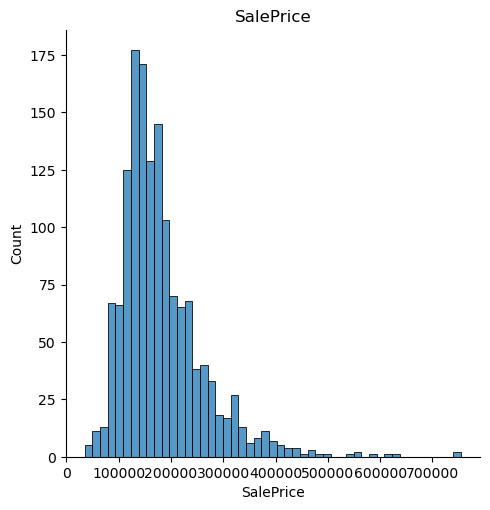

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


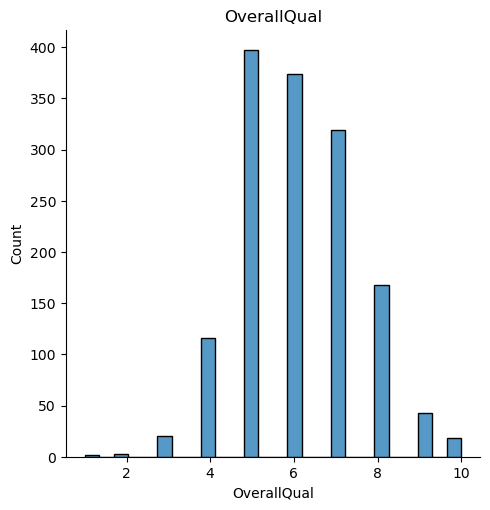

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


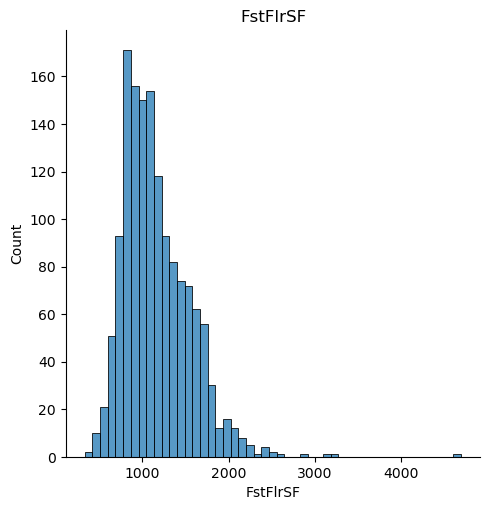

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


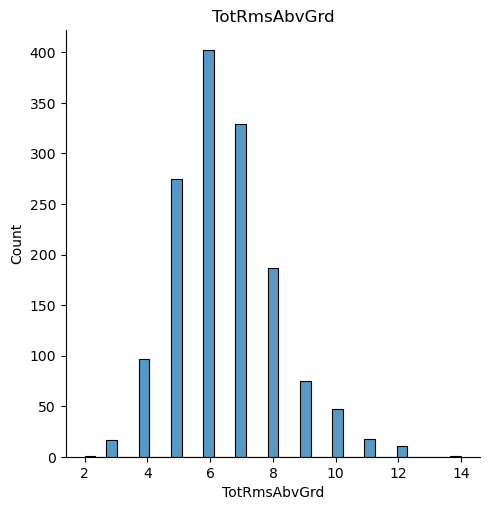

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


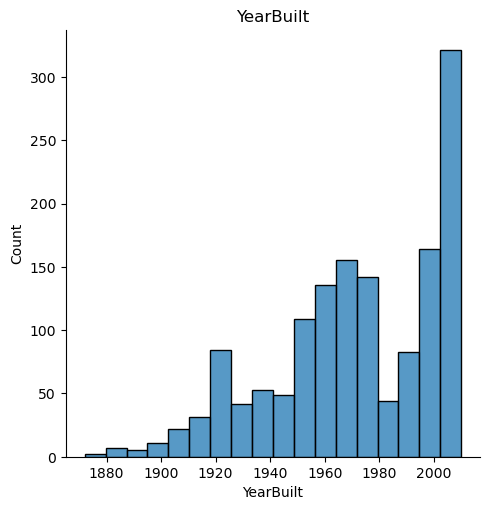

/Users/diegoalvarez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


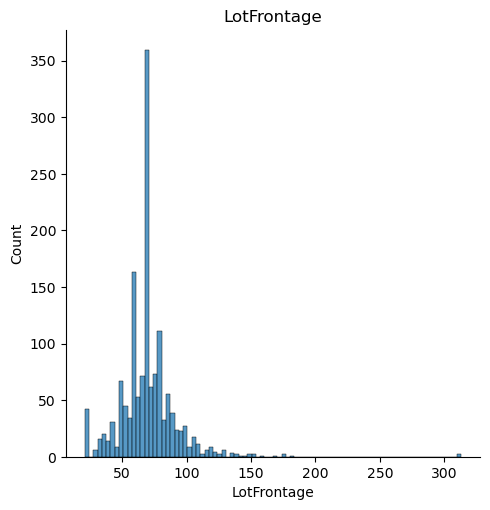

In [19]:
#Histogramas de Variables

gfs = sns.displot(df_ma['SalePrice'])
gfs.set(title='SalePrice')
plt.show()
print()
gfo = sns.displot(df_ma['OverallQual'])
gfo.set(title='OverallQual')
plt.show()
print()
gff = sns.displot(df_ma['FstFlrSF'])
gff.set(title='FstFlrSF')
plt.show()
print()
gft = sns.displot(df_ma['TotRmsAbvGrd'])
gft.set(title='TotRmsAbvGrd')
plt.show()
print()
gfy = sns.displot(df_ma['YearBuilt'])
gfy.set(title='YearBuilt')
plt.show()
print()
gfs = sns.displot(df_ma['LotFrontage'])
gfs.set(title='LotFrontage')
plt.show()

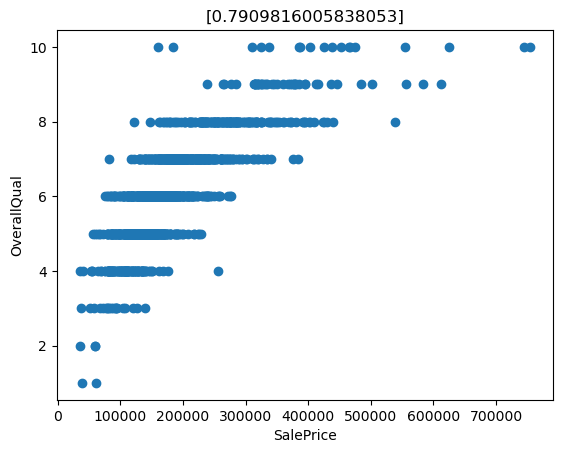

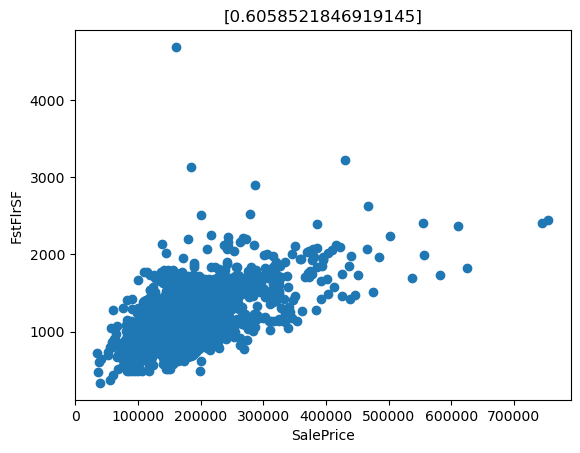

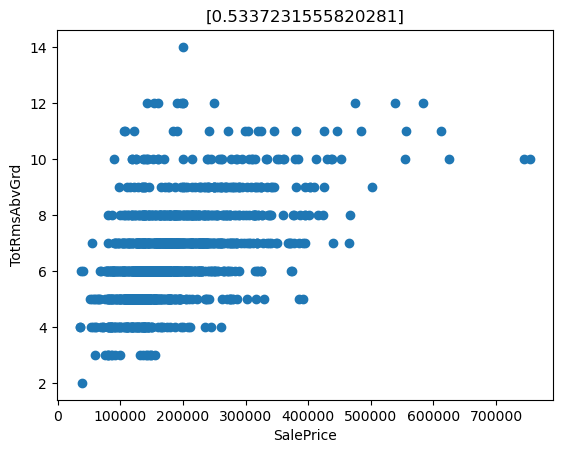

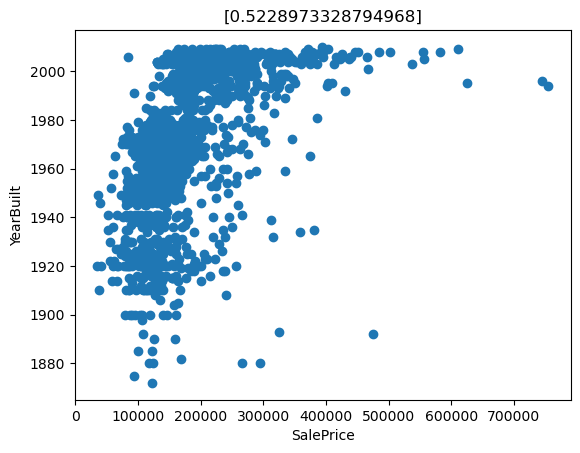

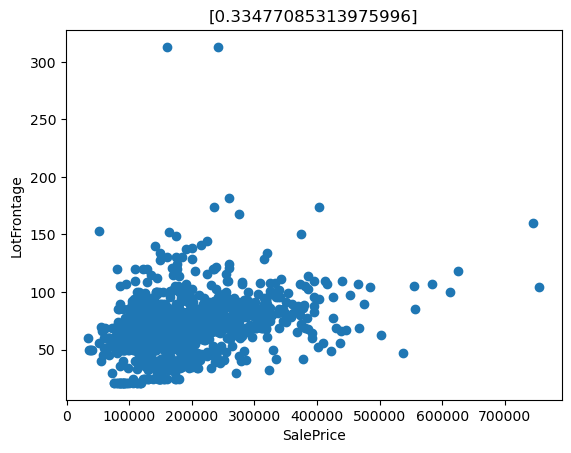

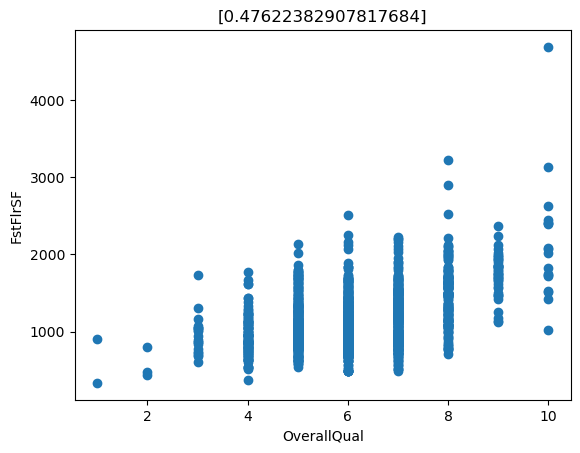

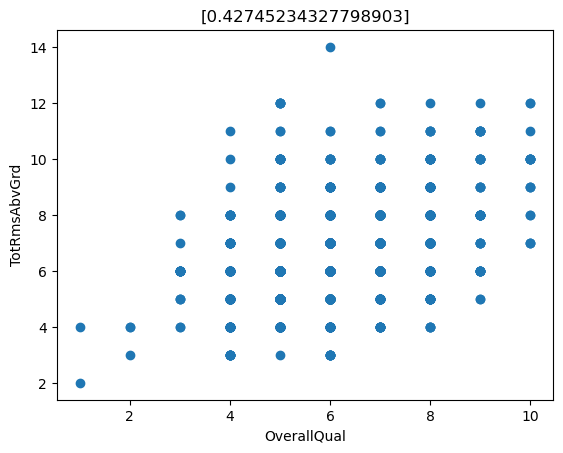

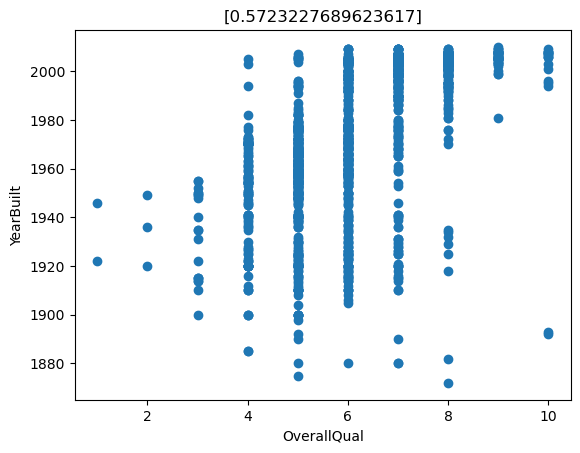

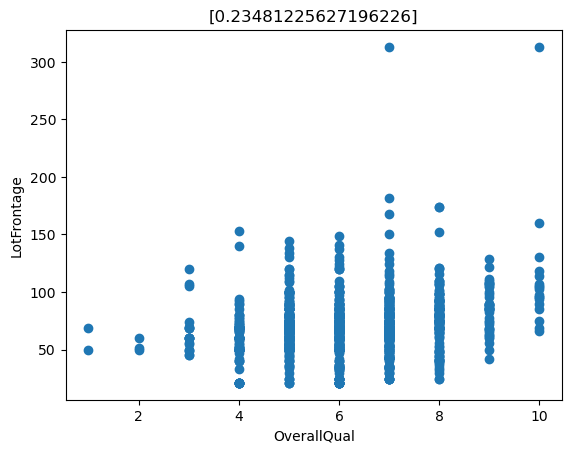

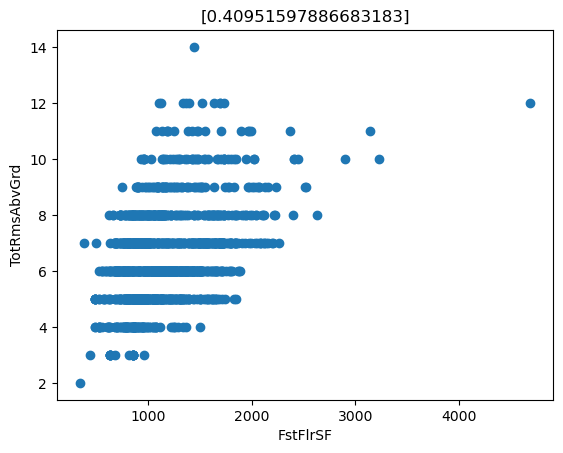

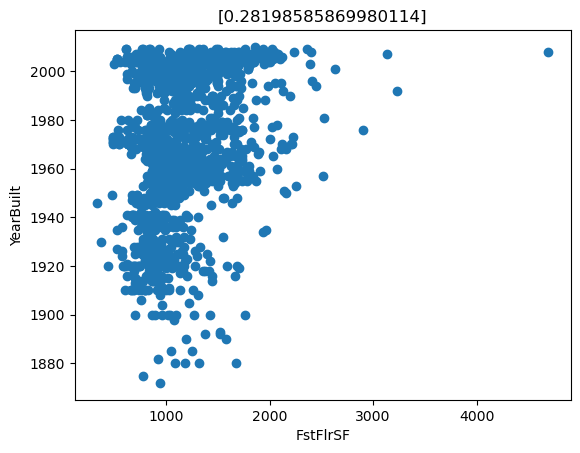

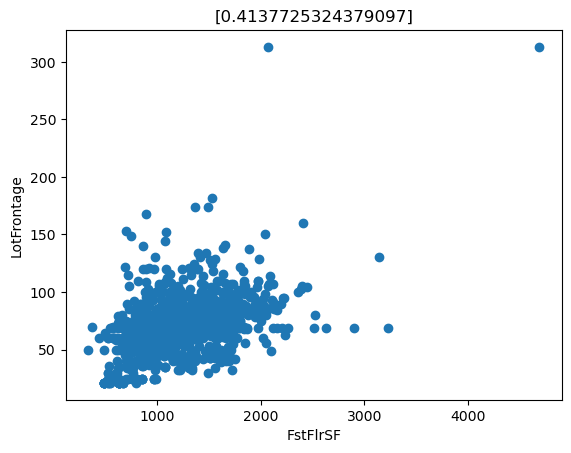

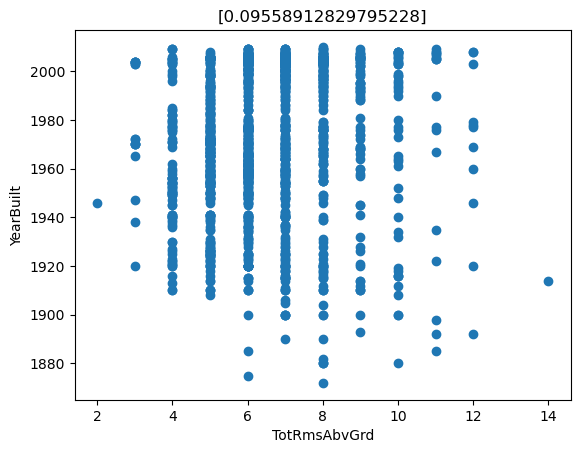

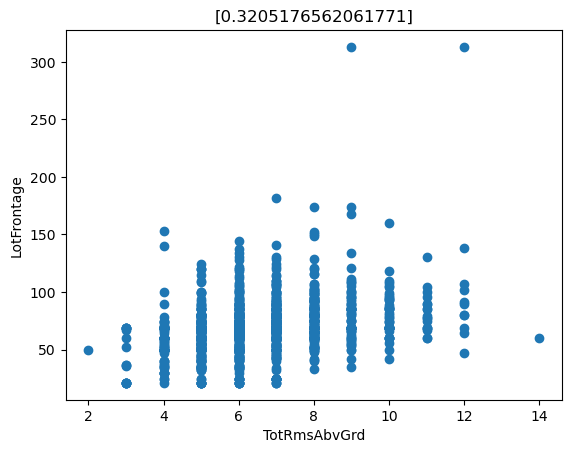

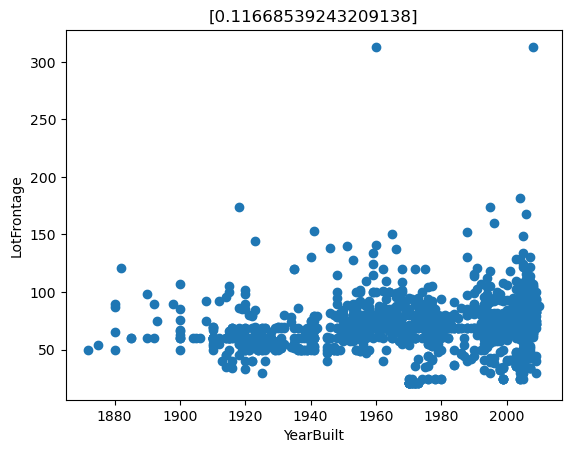

In [20]:
#Correlación

def tr_corr(x, y, x_label, y_label):
    cc = np.corrcoef(x, y)[0, 1]
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title([cc])
    plt.show()
    print()

#Correlación para Variables
tr_corr(df_ma['SalePrice'], df_ma['OverallQual'], 'SalePrice', 'OverallQual')
tr_corr(df_ma['SalePrice'], df_ma['FstFlrSF'], 'SalePrice', 'FstFlrSF')
tr_corr(df_ma['SalePrice'], df_ma['TotRmsAbvGrd'], 'SalePrice', 'TotRmsAbvGrd')
tr_corr(df_ma['SalePrice'], df_ma['YearBuilt'], 'SalePrice', 'YearBuilt')
tr_corr(df_ma['SalePrice'], df_ma['LotFrontage'], 'SalePrice', 'LotFrontage')
tr_corr(df_ma['OverallQual'], df_ma['FstFlrSF'], 'OverallQual', 'FstFlrSF')
tr_corr(df_ma['OverallQual'], df_ma['TotRmsAbvGrd'], 'OverallQual', 'TotRmsAbvGrd')
tr_corr(df_ma['OverallQual'], df_ma['YearBuilt'], 'OverallQual', 'YearBuilt')
tr_corr(df_ma['OverallQual'], df_ma['LotFrontage'], 'OverallQual', 'LotFrontage')
tr_corr(df_ma['FstFlrSF'], df_ma['TotRmsAbvGrd'], 'FstFlrSF', 'TotRmsAbvGrd')
tr_corr(df_ma['FstFlrSF'], df_ma['YearBuilt'], 'FstFlrSF', 'YearBuilt')
tr_corr(df_ma['FstFlrSF'], df_ma['LotFrontage'], 'FstFlrSF', 'LotFrontage')
tr_corr(df_ma['TotRmsAbvGrd'], df_ma['YearBuilt'], 'TotRmsAbvGrd', 'YearBuilt')
tr_corr(df_ma['TotRmsAbvGrd'], df_ma['LotFrontage'], 'TotRmsAbvGrd', 'LotFrontage')
tr_corr(df_ma['YearBuilt'], df_ma['LotFrontage'], 'YearBuilt', 'LotFrontage')

In [77]:
class LinearRegression:
    def __init__(self, alpha=0.001, epochs=100, print_error_each=100):
        self.alpha = alpha
        self.epochs = epochs
        self.print_error_each = print_error_each
        self.manual_models = {}
        self.sklearn_models = {}
        self.errors = {}
    
    def _calculate_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def _gradient_descent(self, X, y, beta):
        y_pred = np.dot(X, beta)
        error = self._calculate_error(y, y_pred)
        gradient = np.dot(X.T, (y_pred - y)) / len(y)
        beta -= self.alpha * gradient
        return beta, error

    def train_manual_model(self, X, y):
        X = np.column_stack((X, np.ones_like(X)))
        beta = np.zeros(X.shape[1]) 
        self.manual_models[0] = beta.copy()
        self.errors[0] = float('inf')

        for epoch in range(1, self.epochs + 1):
            beta, error = self._gradient_descent(X, y, beta)
            self.manual_models[epoch] = beta.copy()
            self.errors[epoch] = error
            if epoch % self.print_error_each == 0:
                print(f"Iteration {epoch}: Error = {error}")

    def plot_learning_curve(self):
        iterations = list(self.errors.keys())
        errors = list(self.errors.values())
        plt.plot(iterations, errors)
        plt.title('Learning Curve')
        plt.xlabel('Iterations')
        plt.ylabel('Error')
        plt.show()

    def plot_model_evolution(self, X, y, n=1):
        X = np.column_stack((X, np.ones_like(X)))
        for epoch in range(0, self.epochs + 1, n):
            beta = self.manual_models[epoch]
            y_pred = np.dot(X, beta)
            plt.plot(X[:, 0], y_pred, label=f'Epoch {epoch}')
        plt.scatter(X[:, 0], y, color='red', label='Data')
        plt.title('Model Evolution')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.show()

    def train_sklearn_model(self, X, y):
        from sklearn.linear_model import LinearRegression
        lr = LinearRegression()
        lr.fit(X.reshape(-1, 1), y)
        self.sklearn_models['b0'] = lr.intercept_
        self.sklearn_models['b1'] = lr.coef_[0]

    def predict_combined(self, X):
        manual_preds = self.predict_manual(X)
        sklearn_preds = self.predict_sklearn(X)
        combined_preds = (manual_preds + sklearn_preds) / 2
        return manual_preds, sklearn_preds, combined_preds

    def predict_manual(self, X):
        X = np.column_stack((X, np.ones_like(X)))
        predictions = []
        for epoch in range(self.epochs + 1):
            beta = self.manual_models[epoch]
            y_pred = np.dot(X, beta)
            predictions.append(y_pred)
        return predictions

    def predict_sklearn(self, X):
        from sklearn.linear_model import LinearRegression
        lr = LinearRegression()
        lr.intercept_ = self.sklearn_models['b0']
        lr.coef_ = np.array([self.sklearn_models['b1']])
        return lr.predict(X.reshape(-1, 1))

In [78]:
#Dataframe para Entrenamiento y Validacion
df_tr = pd.DataFrame(data_entre, columns=['SalePrice', 'OverallQual', 'FstFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df_val = pd.DataFrame(data_val, columns=['SalePrice', 'OverallQual', 'FstFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

Iteration 10: Error = 20045697764.547054
Iteration 20: Error = 10404582253.60079
Iteration 30: Error = 6149357533.809774
Iteration 40: Error = 4271116040.0130935
Iteration 50: Error = 3441921067.786913
Iteration 60: Error = 3075707457.8797174
Iteration 70: Error = 2913824048.743227
Iteration 80: Error = 2842118988.1633725
Iteration 90: Error = 2810213049.850993
Iteration 100: Error = 2795872109.636188


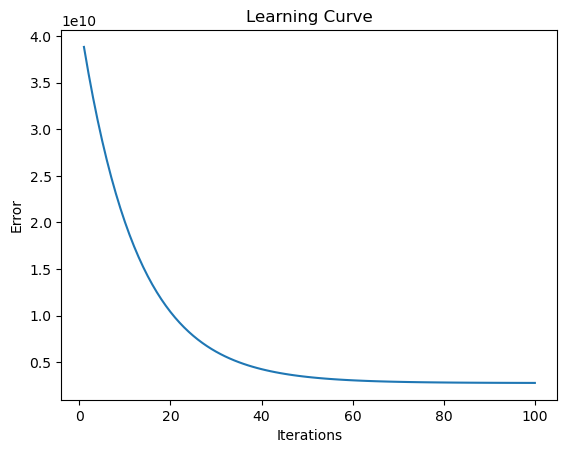

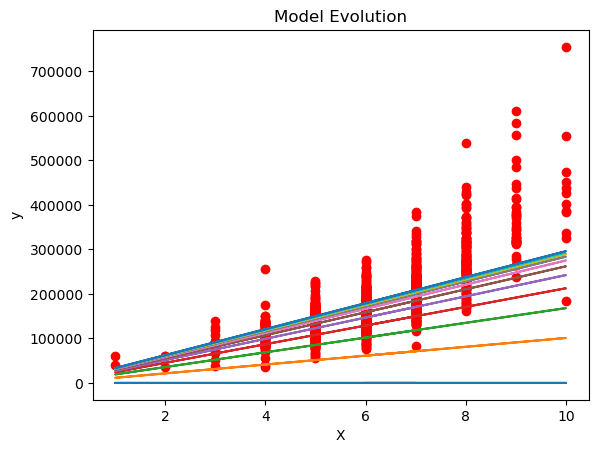

Calculando errores...
Error del modelo manual: 3150697032.9611044
Error del modelo de scikit-learn: 2630182608.9486394
Error del modelo combinado: 3980970125.2319293


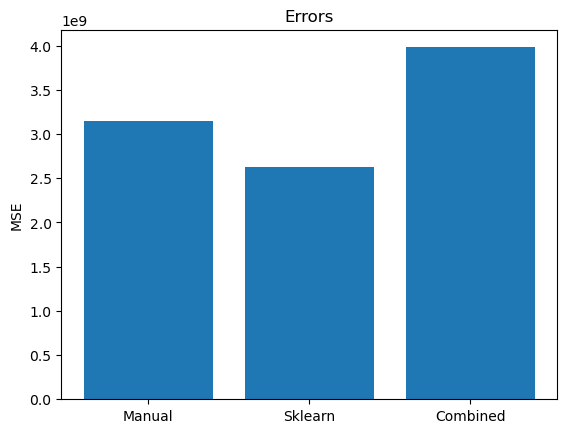

Conclusión: El modelo de Scikit-learn es el mejor.


In [79]:
X_train = df_tr['OverallQual'].values
y_train = df_tr['SalePrice'].values

X = df_val['OverallQual'].values
y_test = df_val['SalePrice'].values

lr_comparison = LinearRegression(alpha=0.001, epochs=100, print_error_each=10)

lr_comparison.train_manual_model(X_train, y_train)

lr_comparison.plot_learning_curve()

lr_comparison.plot_model_evolution(X_train, y_train, n=10)

lr_comparison.train_sklearn_model(X_train, y_train)

manual_preds, sklearn_preds, combined_preds = lr_comparison.predict_combined(X_test)

print("Calculando errores...")
error_manual = lr_comparison._calculate_error(y_val, manual_preds[-1])
error_sklearn = lr_comparison._calculate_error(y_val, sklearn_preds)
error_combined = lr_comparison._calculate_error(y_val, combined_preds)

print(f"Error del modelo manual: {error_manual}")
print(f"Error del modelo de scikit-learn: {error_sklearn}")
print(f"Error del modelo combinado: {error_combined}")
    
plt.bar(['Manual', 'Sklearn', 'Combined'], [error_manual, error_sklearn, error_combined])
plt.title('Errors')
plt.ylabel('MSE')
plt.show()

if error_manual < error_sklearn and error_manual < error_combined:
    print("Conclusión: El modelo manual es el mejor.")
elif error_sklearn < error_manual and error_sklearn < error_combined:
    print("Conclusión: El modelo de Scikit-learn es el mejor.")
else:
    print("Conclusión: El modelo comvinado es el mejor.")